In [1]:
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
print(test_labels)

[7 2 1 ... 4 5 6]


Index 0: Label 7


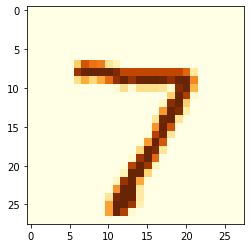

In [3]:
import matplotlib.pyplot as plt
plt.imshow(test_data[0].reshape((28, 28)), cmap=plt.cm.YlOrBr)
print('Index %d: Label %d' % (0, test_labels[0]))

In [4]:
width = 28
height = 28
x_train = train_data.reshape(60000, width*height).astype('float32') / 255.0
x_test = test_data.reshape(10000, width*height).astype('float32') / 255.0

In [32]:
width = 28
height = 28
x_train = train_data.reshape(60000, width*height).astype('float32') / 255.0
x_test = test_data.reshape(10000, width*height).astype('float32') / 255.0

# < 데이터 전처리 : one-hot 인코딩 >
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

In [6]:
x_train.shape

(60000, 784)

In [7]:
# < 모델 구성 >
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# < 모델 설정 >
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# < 모델 학습 >
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6180 - acc: 0.8421
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2884 - acc: 0.9176A: 0s - loss: 0.2894 - acc: 0.
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2366 - acc: 0.9326
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2019 - acc: 0.9426
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1758 - acc: 0.9497
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1550 - acc: 0.9566
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1378 - acc: 0.9611
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1245 - acc: 0.9651
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - acc: 0.9681
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1033 - acc: 0.9708

In [8]:
model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 0.0793 - acc: 0.9757


[0.07927892357110977, 0.9757000207901001]

In [9]:
model.predict(x_test[:1])

array([[4.5424458e-06, 8.1983552e-07, 6.1925029e-04, 1.8294452e-03,
        6.7531758e-08, 1.1677308e-06, 1.3969405e-10, 9.9735224e-01,
        4.9605187e-05, 1.4282501e-04]], dtype=float32)

In [10]:
print(x_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_test[0])
model.predict(x_test[:1])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


array([[4.5424458e-06, 8.1983552e-07, 6.1925029e-04, 1.8294452e-03,
        6.7531758e-08, 1.1677308e-06, 1.3969405e-10, 9.9735224e-01,
        4.9605187e-05, 1.4282501e-04]], dtype=float32)

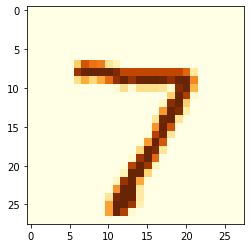

In [12]:
plt.imshow(test_data[0].reshape((28, 28)), cmap=plt.cm.YlOrBr)

In [13]:
from sklearn import datasets, tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))
print('예측: ', predictions[0])
print('정답: ', y_test[0])

0.8752
예측:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
정답:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [14]:
# 라벨데이터를 원핫인코딩 하지 않은 데이터
from sklearn import datasets, tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, train_labels)
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))
print('예측: ', predictions[0])
print('정답: ', test_labels[0])

0.8752
예측:  7
정답:  7


In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
dataset = datasets.load_digits()
train_data, test_data, train_labels, test_labels = train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=42)
clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.9932659932659933


In [57]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
dataset = datasets.load_digits()
train_data, test_data, train_labels, test_labels = train_test_split(dataset.data, dataset.target, test_size=0.33, random_state=42)
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.98989898989899


In [58]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.8383838383838383


In [59]:
print('예측: ', predictions[7])
print('정답: ', test_labels[7])

예측:  3
정답:  2
